In [1]:
import cv2
import numpy as np

In [2]:

class Coord(object):
    ''' Point '''
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def setT(self, t):
        self.x = t[0]
        self.y = t[1]

    def getT(self):
        return (self.x, self.y)

    t = property(getT, setT)

    def getTInteger(self):
        return (int(self.x), int(self.y))

    ti = property(getTInteger, setT)

    def __str__(self):
        return "({0},{1})".format(self.x,self.y)

    def __add__(self, o):
        return Coord(self.x + o.x, self.y + o.y)

    def __sub__(self, o):
        return Coord(self.x - o.x, self.y - o.y)

    def __pow__(self, o):
        return self.x * o.x + self.y * o.y

    def __truediv__(self, num):
        return Coord(self.x/num, self.y/num)

    def __mul__(self, num):
        return Coord(self.x*num, self.y*num)

    def __copy__(self):
        return Coord(self.x, self.y)
    
    def __deepcopy__(self, memo):
        return Coord(self.x, self.y)

    @staticmethod
    def distance(o1, o):
        return (o1 - o).norm()

    @staticmethod
    def angle(o1, o2):
        ''' Goc xoay quay goc toa do Oxy '''
        a = math.atan2(o2.y, o2.x) - math.atan2(o1.y, o1.x)
        while a > math.pi:
            a -= 2*math.pi
        while a < -math.pi:
            a += 2*math.pi
        return a


    @staticmethod
    def abs_angle(o1, o):
        cosa = (o1**o)/(o1.norm()*o.norm())
        return math.degrees(math.acos(cosa*0.9999))

    
    def rotateAround(self, origin, angle):
        ''' Xoay diem hien tai quanh diem `origin` mot goc `angle` '''
        if type(origin) is Coord:
            o = origin.t
        else:
            o = origin
        dx = self.x - o[0]
        dy = self.y - o[1]
        newdx = math.cos(angle) * dx - math.sin(angle) * dy
        newdy = math.sin(angle) * dx + math.cos(angle) * dy
        self.x = newdx + o[0]
        self.y = newdy + o[1]
        return self

    def norm(self):
        return math.sqrt(self.x*self.x + self.y*self.y)


def rotatePointsAround(origin, points, alpha):
    pass

import math


class Line(object):
    ''' Line '''
    
    def __init__(self, p1, p2):
        p1_ = np.array([p1.x, p1.y, 1])
        p2_ = np.array([p2.x, p2.y, 1])
        self.line_ = np.cross(p1_, p2_)
    
    def intersect(self, other_line):
        ret_ = np.cross(self.line_, other_line.line_)
        if ret_[2] == 0:
            return None
        else:
            ret_ /= ret_[2]
            return ret_[0], ret_[1]
    
    def distance2point(self, point):
        point_ = np.array([point.x, point.y, 1])
        ret = np.dot(point_, self.line_)
        a = self.line_[0]
        b = self.line_[1]
        return abs(ret/math.sqrt(a*a + b*b))
    
    
# line, line => point (intersection)
# point, point => line
# point, point => distance
# point, line => distance
# point, point, point => angle
# rotate(point, point, alpha)
# rotate_multiple(point, points, alpha)



In [3]:
from matplotlib import pyplot as plt

In [4]:
''' Transform standardgrid, by folding or curling around line, with parameter alpha '''
def transform(standargrid, grid_size, line, alpha, method='fold'):
    transformed = []
    # alpha = 0.4
    for x,y in standargrid:
        d = line.distance2point(Coord(x,y))/(grid_size/2)
        if method == 'fold':
            w = alpha/(d+alpha)
        elif method == 'curl':
            w = 1 - math.pow(d, alpha)
        transformed.append(Coord(x,y) + v*w)

    xs = [point.x for point in transformed]
    ys = [point.y for point in transformed]
    return xs, ys

In [5]:
# Plot and save result 
def ppp(xs, ys, dest):
    plt.clf()
    plt.cla()
    plt.figure(figsize=(10,10))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.scatter(xs[::2], ys[::2], s=11, c=xs[::2])
    plt.savefig(dest)

/home/loitg/miniconda2/envs/dewarp/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/loitg/miniconda2/envs/dewarp/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-bccb81683f92>", line 13, in <module>
    ppp(xs, ys, './temp/%.2f_curl.png' % alpha)
  File "<ipython-input-5-80610d50bf13>", line 8, in ppp
    plt.savefig(dest)
  File "/home/loitg/miniconda2/envs/dewarp/lib/python3.6/site-packages/matplotlib/pyplot.py", line 723, in savefig
    res = fig.savefig(*args, **kwargs)
  File "/home/loitg/miniconda2/envs/dewarp/lib/python3.6/site-packages/matplotlib/figure.py", line 2203, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/home/loitg/miniconda2/envs/dewarp/lib/python3.6/site-packages/matplotlib/backend_bases.py", line 2105, in print_figure
    **kwargs)
  File "/home/loitg/miniconda2/envs/dewarp/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py", line 514, in print_png
    F

KeyboardInterrupt: 

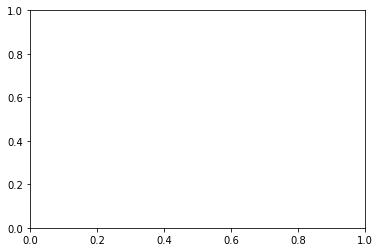

Error in callback <function flush_figures at 0x7f038095a510> (for post_execute):


KeyboardInterrupt: 

In [6]:
# Create standard grid 100x100 to transform
a, b = np.meshgrid(range(101),range(101))
standargrid = np.array([a,b]).swapaxes(0,2).reshape(-1,2)
# Create line to fold or curl around this line
p0 = Coord(50,0)
v = Coord(10.0,-20.0)
line = Line(p0, p0+v)

for alpha in np.linspace(1.6,2.6,11):
    xs, ys = transform(standargrid, 100, line, alpha, method='fold')
    ppp(xs, ys, './temp/%.2f_fold.png' % alpha)
    xs, ys = transform(standargrid, 100, line, alpha, method='curl')
    ppp(xs, ys, './temp/%.2f_curl.png' % alpha)

In [9]:
2.25/7*107

34.392857142857146